#### Diagram jalur / Path diagrams (Gangga Anuraga)

![image](https://user-images.githubusercontent.com/36166387/79942759-c5178a00-8491-11ea-8815-a01af227b663.png)

Hipotesis yang diangkat berdasarkan diagram jalur diatas yaitu :

H1 : Vaiabel A (Status Gizi) dipengaruhi oleh variabel B (Lingkungan)

H2 : Variabel A (Staus Gizi) dipengaruhi oleh variabel E (Pendidikan)

H3 : Variabel A (Status Gizi) dipengaruhi oleh variabel D (Ekonomi)

H4 : Variabel B (Lingkungan) dipengaruhi oleh variabel C (Pengetahuan)

H5 : Variabel B (Lingkungan) dipengaruhi oleh variabel D (Ekonomi)

H6 : Variabel C (Pengetahuan) dipengaruhi oleh variabel E (Pendidikan)

H7 : Variabel C (Pengetahuan) dipengaruhi oleh variabel D (Ekonomi)

H8 : Variabel E (Pendidikan) dipengaruhi oleh variabel D (Ekonomi)

In [1]:
library("sem")

In [2]:
data <- read.csv("data_analisis_jalur.csv")
head(data)

,ï..X1.1,X1.2,X1.3,X1.4,Y1.1,Y1.2,Y1.3,A,B,C,D,E,X2,X1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,4,5,4,4,4,4,4.00000,4.33333,3.66667,4.25,4.000000,4,4.5
2,3,3,4,4,3,5,3,3.00000,4.33333,3.66667,3.50,3.666667,3,4.0
3,5,5,3,5,3,4,4,4.00000,4.33333,3.66667,4.50,3.666667,5,4.0
4,3,3,3,3,3,4,3,2.66667,3.00000,2.66667,3.00,3.333333,3,3.0
5,3,3,3,4,4,4,4,3.66667,3.66667,3.33333,3.25,4.000000,3,3.5
6,5,5,5,5,4,4,4,3.66667,3.66667,4.66667,5.00,4.000000,5,5.0


In [3]:
dim(data)

[1] 49 14

In [4]:
library("ggplot2")

In [5]:
# install.packages("GGally")

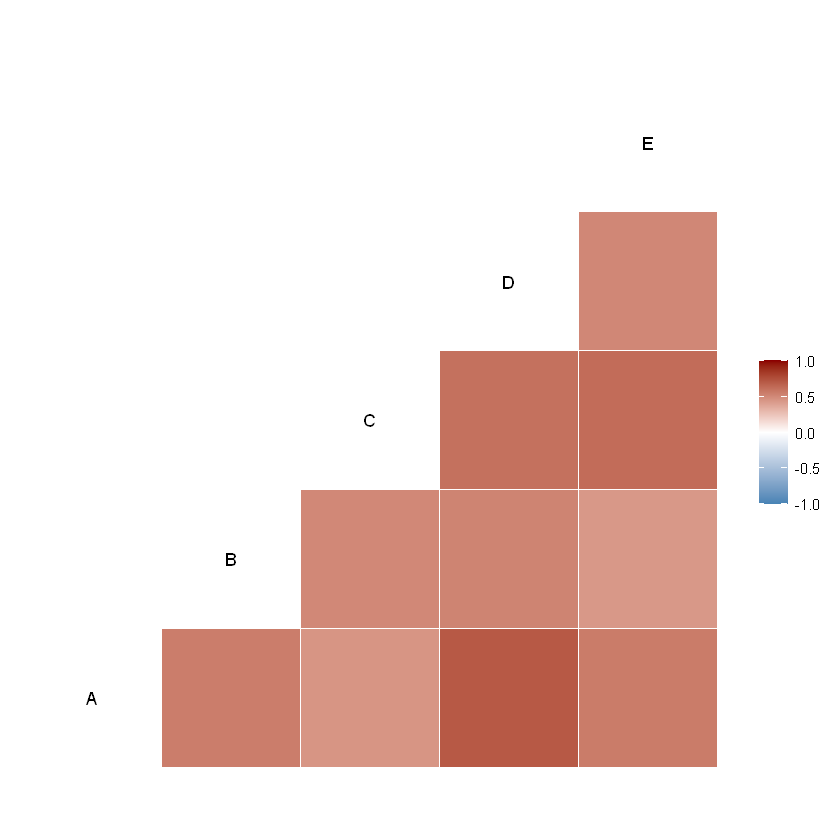

In [7]:
update.packages("GGally",dependencies = TRUE)
library("GGally")
ggcorr(data[, 8:12], low = "steelblue", mid = "white", high = "darkred")

In [7]:
options(digits = 3)
cor(data[, 8:12],method = "pearson")

,A,B,C,D,E
A,1.000,0.552,0.450,0.708,0.558
B,0.552,1.000,0.503,0.523,0.437
C,0.450,0.503,1.000,0.604,0.626
D,0.708,0.523,0.604,1.000,0.508
E,0.558,0.437,0.626,0.508,1.000


Pada analisis korelasi dapat diketahui bahwa kelima variabel memiliki cukup kuat dan positif

In [8]:
#help(cor)

In [9]:
datakorelasi <- readMoments(diag = FALSE, names=c("A","B","C","D","E"),text = "
                        0.552 
                        0.450 0.503 
                        0.708 0.523 0.604 
                        0.558 0.437 0.626 0.508")
datakorelasi

,A,B,C,D,E
A,1.000,0.000,0.000,0.000,0
B,0.552,1.000,0.000,0.000,0
C,0.450,0.503,1.000,0.000,0
D,0.708,0.523,0.604,1.000,0
E,0.558,0.437,0.626,0.508,1


In [10]:
modelpath <- specifyModel(text = "
                      D->A,gam11 
                      D->B,gam21 
                      D->C,gam31 
                      D->E,gam41 
                      B->A,beta12 
                      C->B,beta23 
                      E->A,beta14 
                      E->C,beta34 
                      A<->A,phi11 
                      B<->B,phi22 
                      C<->C,phi33 
                      E<->E,phi44")

NOTE: it is generally simpler to use specifyEquations() or cfa()
      see ?specifyEquations


In [30]:
path.out <- sem(modelpath, datakorelasi, N=49,fixed.x = c("D"))
effects(path.out)
summary(path.out)


 Total Effects (column on row)
      B      C     D     E
A 0.198 0.0583 0.708 0.247
B 0.000 0.2946 0.523 0.127
C 0.000 0.0000 0.604 0.430
E 0.000 0.0000 0.508 0.000

 Direct Effects
      B     C     D     E
A 0.198 0.000 0.492 0.222
B 0.000 0.295 0.345 0.000
C 0.000 0.000 0.385 0.430
E 0.000 0.000 0.508 0.000

 Indirect Effects
  B      C     D      E
A 0 0.0583 0.216 0.0251
B 0 0.0000 0.178 0.1267
C 0 0.0000 0.219 0.0000
E 0 0.0000 0.000 0.0000


 Model Chisquare =  2.52   Df =  2 Pr(>Chisq) = 0.284
 AIC =  26.5
 BIC =  -5.27

 Normalized Residuals
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -0.523   0.000   0.000   0.016   0.033   0.504 

 R-square for Endogenous Variables
    A     B     C     E 
0.578 0.329 0.502 0.258 

 Parameter Estimates
       Estimate Std Error z value Pr(>|z|)         
gam11  0.492    0.1197    4.11    3.96e-05 A <--- D
gam21  0.345    0.1484    2.33    2.00e-02 B <--- D
gam31  0.385    0.1182    3.26    1.11e-03 C <--- D
gam41  0.508    0.1243    4.09    4.39e-05 E <--- D
beta12 0.198    0.1105    1.79    7.34e-02 A <--- B
beta23 0.295    0.1484    1.99    4.71e-02 B <--- C
beta14 0.222    0.1093    2.03    4.27e-02 A <--- E
beta34 0.430    0.1182    3.64    2.74e-04 C <--- E
phi11  0.419    0.0855    4.90    9.63e-07 A <--> A
phi22  0.671    0.1370    4.90    9.63e-07 B <--> B
phi33  0.498    0.1016    4.90    9.63e-07 C <--> C
phi44  0.742    0.1514    4.90    9.63e-07 E <--> E

 Iterations 

In [33]:
# Diagram Jalur / Path Diagram
library(devtools)
dev_mode()

Dev mode: ON


Registered S3 methods overwritten by 'huge':
  method    from   
  plot.sim  BDgraph
  print.sim BDgraph


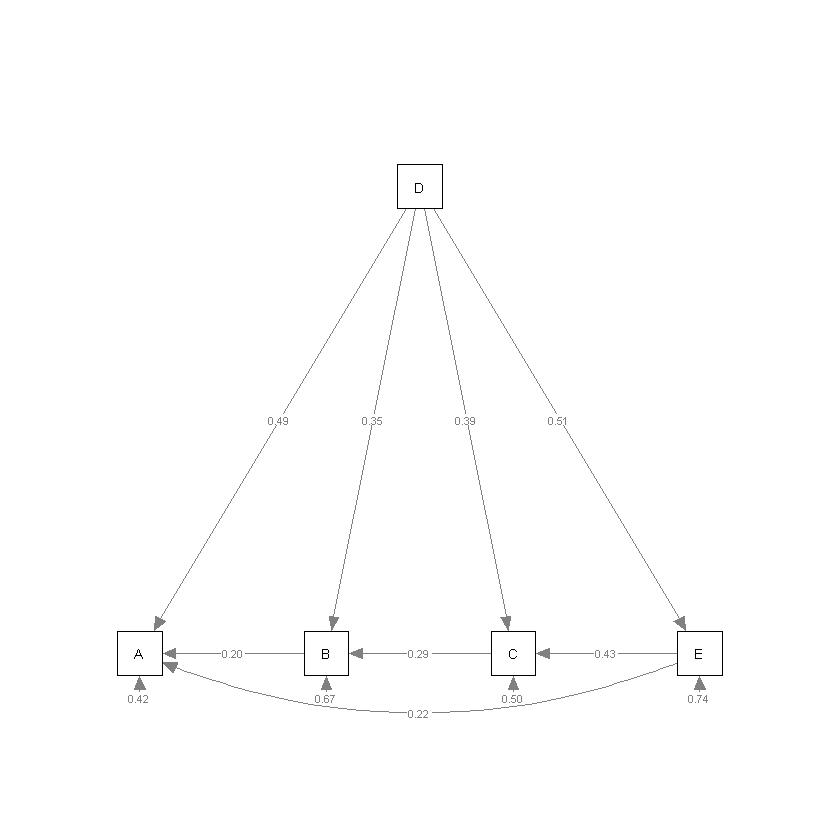

In [34]:
library(semPlot)
semPaths(path.out,whatLabels="est.std",style="lisrel",residuals=TRUE)

In [35]:
# names(path.out)

In [36]:
# help(sem)

## Pembahasan : 
#### 1.Pengaruh Langsung




Variabel D (Ekonomi), Variabel E (Pendidikan) berpengaruh signifikan terhadap Variabel A (Status Gizi), Variabel B (Lingkungan) tidak berpengaruh signifikan terhadap Vaiabel A (Status Gizi). Variabel C (Pengetahuan) dan Variabel D (Ekonomi) berpengaruh signifikan terhadap terhadap variabel B (Lingkungan). Variabel D (Ekonomi) dan Variabel E (Pendidikan) berpengaruh signifikan terhadap variabel C (Pengetahuan). Variabel D (Ekonomi) berpengaruh signifikan terhadap Variabel E (Pendidikan). (Z_value dapat dibandingkan dengan 1,96 dengan alpha 5%, atau P_value dibandingkan dengan alpha 5%)

Penulisan Model --> 

Model Estimasi Persamaan Variabel A : 0.492D + 0.198B +  0.222E (R-square = 0.578)

Model Estimasi Persamaan Variabel B : 0.345D + 0.295C (R-square = 0.329)

Model Estimasi Persamaan Variabel C : 0.385D + 0.430E (R-square = 0.502)

Model Estimasi Persamaan Variabel E : 0.508D (R-square = 0.258)

#### R-square menginterpretasikan kebaikan model secara parsial. Banyak model matematis dalam suatu path diagram tergantung dari jumlah variabel yang ditunjuk oleh anak panah (path diagram dibangun dari konseptual teori)

#### Overal Goodness Of Fit : menunjukan kebaikan model secara serentak/struktural ( model sesuai atau model tidak sesuai, dan secara hipotesis yang diharapkan adalah gagal tolak H0). Jika P_value atau nilai probabilitas > alpha 0,05 maka dikatakan model sesuai (tidak ada beda antara observasi dengan prediksi) secara serentak/struktural.
![image](https://user-images.githubusercontent.com/36166387/79942899-ed9f8400-8491-11ea-9333-51e6da2a6cbf.png)


#### 2.Pengaruh Tidak Langsung


![image](https://user-images.githubusercontent.com/36166387/79943003-06a83500-8492-11ea-9c39-4149d842550f.png)

Contoh perhitungan manual :
1. D --> E --> C : 0,508 x 0,43 = 0,218
2. D --> C --> B : 0,604 x 0,295 = 0,178
3. D --> B --> A + D --> E --> A : 0,523 x 0,198 + 0,508 x 0,222 = 0,216
4. E --> C --> B : 0,43 x 0,295 = 0,1268
5. E --> B --> A : 0,1268 x 0,198 = 0,0251
6. C --> B --> A : 0,295 x 0,198 = 0.0584

Signifikansi Pengaruh tidak langsung :
![image](https://user-images.githubusercontent.com/36166387/79943062-29d2e480-8492-11ea-91a7-d5e1c31eff43.png)

![image](https://user-images.githubusercontent.com/36166387/79943112-4838e000-8492-11ea-8c3a-ec2f3c9534de.png)

contoh :
D --> E --> C : E sebagai mediator, 
a = 0.508, sa = 0.1243
b = 0.430, sb = 0.1182

Berdasarkan informasi diatas, nilai Z_value dengan formulasi Sobel dapat dihitung dan tingkat signifikansi dapat dibandingkan dengan titik kritis 1,96.

#### URL jurnal untuk kasus multiple mediating/mediator/mediasi perhitungan tingkat signifikansi ada artikel dibawah :
url = http://quantpsy.org/pubs/preacher_hayes_2008b.pdf

In [37]:
Data = data[, 8:12]
Data = data.frame(Data)
head(Data)

A,B,C,D,E
4.00,4.33,3.67,4.25,4.00
3.00,4.33,3.67,3.50,3.67
4.00,4.33,3.67,4.50,3.67
2.67,3.00,2.67,3.00,3.33
3.67,3.67,3.33,3.25,4.00
3.67,3.67,4.67,5.00,4.00


In [38]:
library("MVN")

In [39]:
# help(mvn)

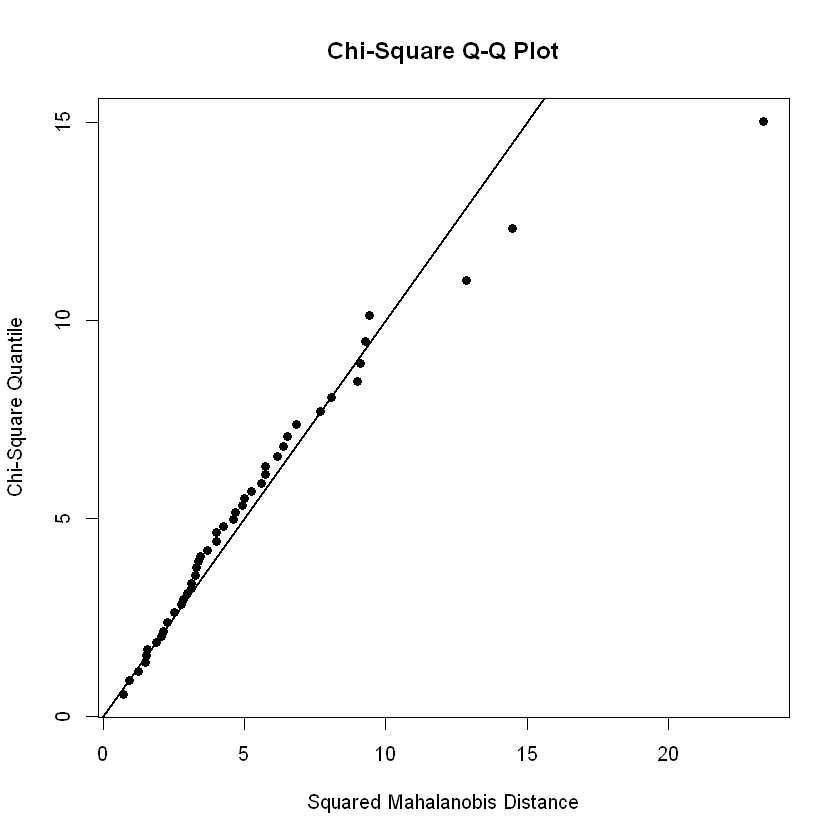

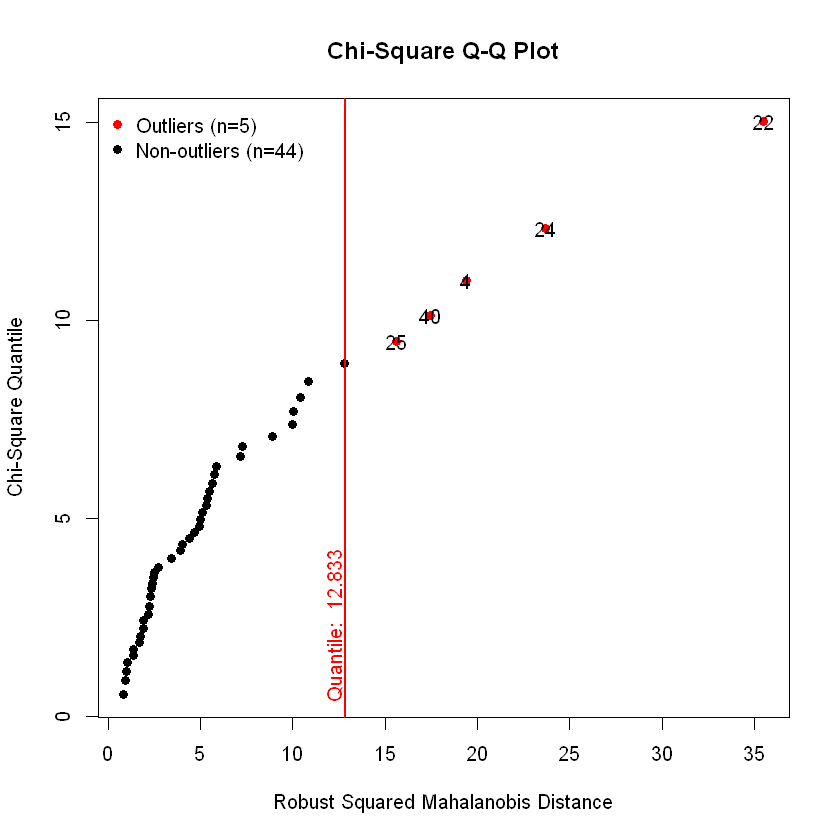

In [40]:
#normal multivariate
normalmulti <- mvn(Data, mvnTest = "mardia", 
cov = TRUE, multivariatePlot = "qq", 
multivariateOutlierMethod = "quan",
showOutliers = TRUE, showNewData = TRUE)

In [41]:
# data tanpa outlier
Data.1 <- normalmulti$newData
head(Data.1)

,A,B,C,D,E
1,4.00,4.33,3.67,4.25,4.00
10,4.00,4.33,4.67,4.00,4.33
11,3.67,3.67,3.67,3.50,3.67
12,3.67,4.00,4.33,4.25,4.33
13,3.67,4.00,4.67,4.75,3.33
14,4.00,4.33,3.67,4.25,3.67


In [42]:
normalmulti

$multivariateNormality
             Test        Statistic              p value Result
1 Mardia Skewness 78.6758273628276 3.32444144842308e-05     NO
2 Mardia Kurtosis 2.36960319523168   0.0178071849728165     NO
3             MVN             <NA>                 <NA>     NO

$univariateNormality
          Test  Variable Statistic   p value Normality
1 Shapiro-Wilk     A         0.872    0.0001    NO    
2 Shapiro-Wilk     B         0.899    0.0005    NO    
3 Shapiro-Wilk     C         0.880    0.0001    NO    
4 Shapiro-Wilk     D         0.919    0.0025    NO    
5 Shapiro-Wilk     E         0.881    0.0001    NO    

$Descriptives
   n Mean Std.Dev Median  Min  Max 25th 75th   Skew Kurtosis
A 49 3.84   0.486   3.67 2.00 4.67 3.67 4.00 -1.024    2.912
B 49 3.90   0.566   4.00 2.33 4.67 3.67 4.33 -0.952    0.625
C 49 3.93   0.593   3.67 2.67 4.67 3.67 4.33 -0.437   -0.521
D 49 4.00   0.610   4.00 1.75 5.00 3.75 4.25 -1.120    2.138
E 49 4.03   0.661   4.00 1.33 5.00 3.67 4.33 -1.240    3.525

$multivariateOutliers
   Observation Mahalanobis Distance Outlier
22          22                 35.5    TRUE
24          24                 23.7    TRUE
4            4                 19.4    TRUE
40          40                 17.4    TRUE
25          25                 15.6    TRUE

$newData
      A    B    C    D    E
1  4.00 4.33 3.67 4.25 4.00
10 4.00 4.33 4.67 4.00 4.33
11 3.67 3.67 3.67 3.50 3.67
12 3.67 4.00 4.33 4.25 4.33
13 3.67 4.00 4.67 4.75 3.33
14 4.00 4.33 3.67 4.25 3.67
15 3.67 3.67 4.67 4.25 4.33
16 4.33 4.00 4.67 4.75 4.33
17 4.33 3.67 3.67 4.25 4.33
18 3.67 4.00 3.67 4.00 4.33
19 4.00 4.00 3.67 4.50 4.67
2  3.00 4.33 3.67 3.50 3.67
20 3.67 4.00 4.67 3.75 5.00
21 3.67 4.67 4.00 4.50 4.00
23 3.33 3.33 3.67 3.25 3.33
26 3.67 3.67 3.33 3.75 3.33
27 4.67 4.67 3.67 4.75 3.67
28 3.33 3.33 3.67 3.25 3.33
29 3.67 4.33 4.33 4.25 4.67
3  4.00 4.33 3.67 4.50 3.67
30 4.00 4.00 3.67 4.00 4.33
31 3.33 3.00 2.67 2.75 3.00
32 4.67 4.67 4.00 4.25 4.33
33 4.00 4.33 4.33 4.00 5.00
34 3.67 4.00 3.67 3.75 3.67
35 4.00 4.33 4.00 3.50 3.67
36 4.33 4.67 4.67 4.00 4.33
37 3.67 4.33 4.33 4.25 4.67
38 4.33 3.67 3.67 4.50 4.33
39 4.00 4.33 3.67 4.25 3.67
41 3.67 3.33 3.67 4.00 4.33
42 3.67 3.67 4.67 4.25 4.67
43 4.67 4.33 4.00 4.75 3.67
44 4.00 4.33 3.67 3.75 4.67
45 4.00 4.67 4.00 3.75 5.00
46 4.00 4.00 4.33 4.50 4.67
47 4.33 4.00 4.33 5.00 3.67
48 4.00 4.33 3.67 4.00 3.67
49 4.00 4.00 4.67 3.75 4.33
5  3.67 3.67 3.33 3.25 4.00
6  3.67 3.67 4.67 5.00 4.00
7  3.67 3.67 4.67 4.25 4.67
8  4.33 3.67 4.67 4.50 5.00
9  3.67 3.33 4.33 4.00 3.67

#### Diatas adalah contoh untuk mengidentifikasi pengujian asumsi normal multivariat, dalam penelitian diharapkan data berdistribusi normal multivariat. Kesimpulan untuk data diatas tidak berdistribusi normal
![image](https://user-images.githubusercontent.com/36166387/79943155-60106400-8492-11ea-8585-9490a5e40b1b.png)